In [14]:
import torch
from torch import nn
from torchvision.datasets.folder import ImageFolder
from torchvision import transforms
import random
from math import sqrt
import imageio as io

In [ ]:
from data_util import *

### Exploring Image Data from Imagenette2

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

image_data = pd.read_csv('./imagenette2-160/noisy_imagenette.csv')
image_data.head(5)

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False
3,train/n02979186/n02979186_21736.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,n02979186,n02979186,n02979186,n02979186,n03394916,False


/var/folders/wt/72984lkd5tx1b3p832b1_xfc0000gn/T/ipykernel_32288/3045227211.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread('./imagenette2-160/' + image_data.at[0, 'path'])


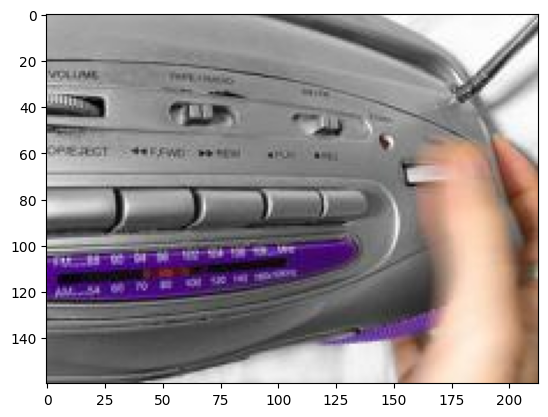

In [47]:
img = io.imread('./imagenette2-160/' + image_data.at[0, 'path'])
plt.imshow(img)

In [43]:
from PIL import Image

img = Image.fromarray(img)
img.show()

In [44]:
t = transforms.RandomResizedCrop(size=(160,160))
img.show()
img = t(img)
img.show()

### Test Out Dataset Creation

In [92]:
from torch.utils.data import DataLoader

dataset = D2VImageDataset(device='cpu', root='./imagenette2-160/train/')
loader = DataLoader(dataset, batch_size=4)

src, trg = next(iter(loader))
print(src.shape)

torch.Size([4, 1, 160, 160])


In [66]:
MG = MaskGenerator()

mask = MG()
print(mask.shape)
print(mask)

torch.Size([10, 10])
tensor([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 0, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 1, 1, 1, 1, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)
